reading path: /Volumes/FAIR/Registered_MPS3/SDH4


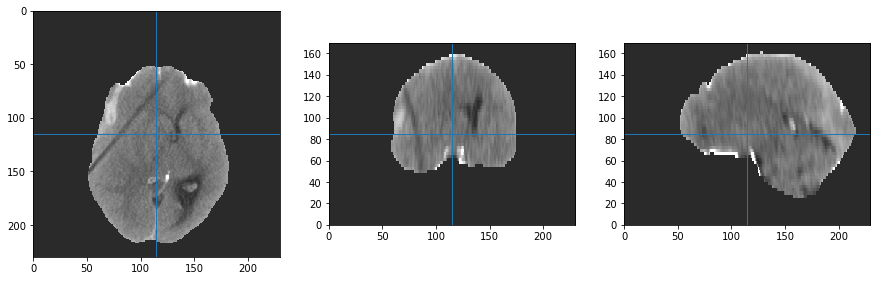

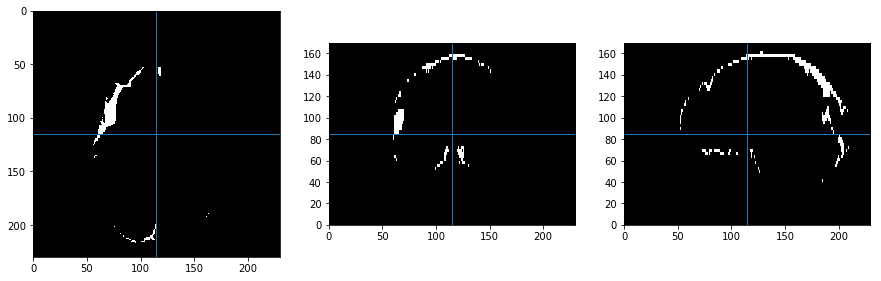

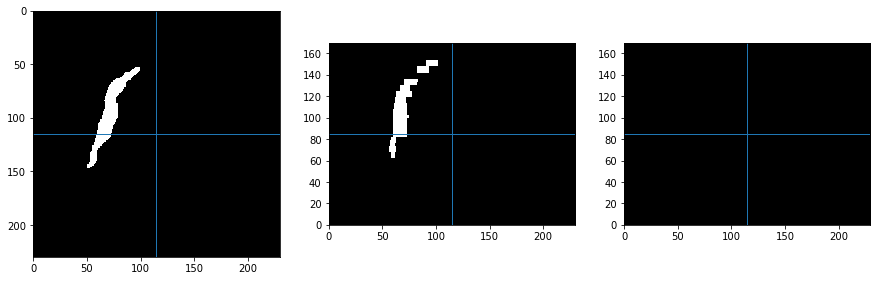

reading path: /Volumes/FAIR/Registered_MPS3/SDH7


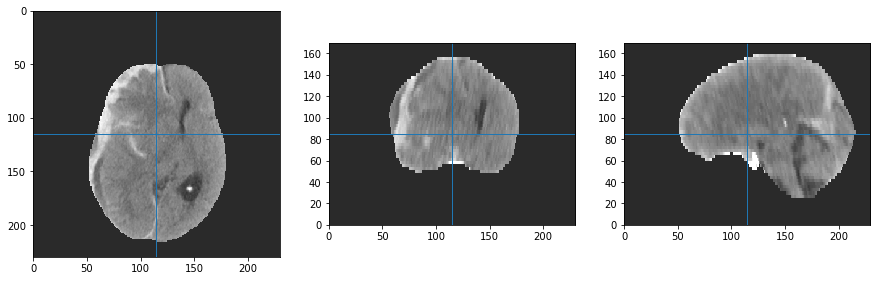

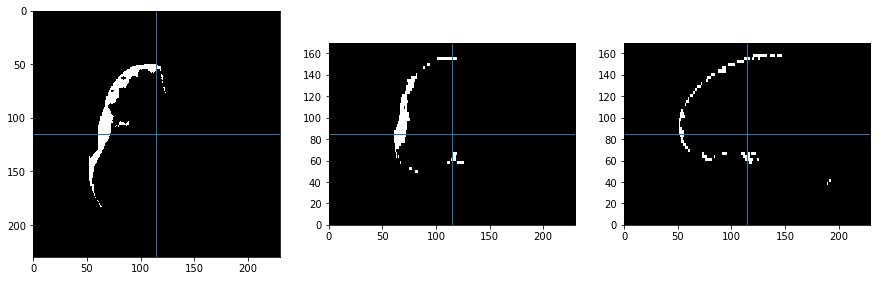

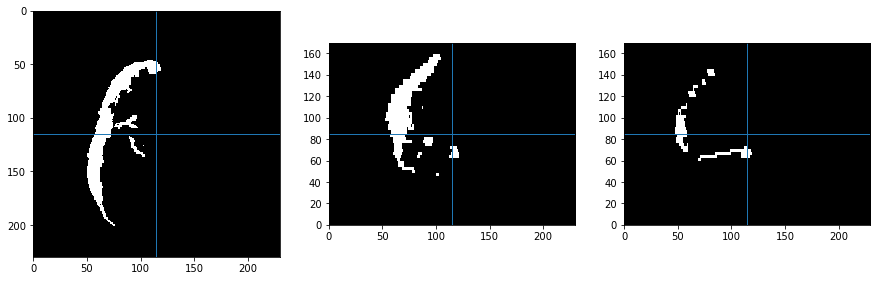

reading path: /Volumes/FAIR/Registered_MPS3/SDH8


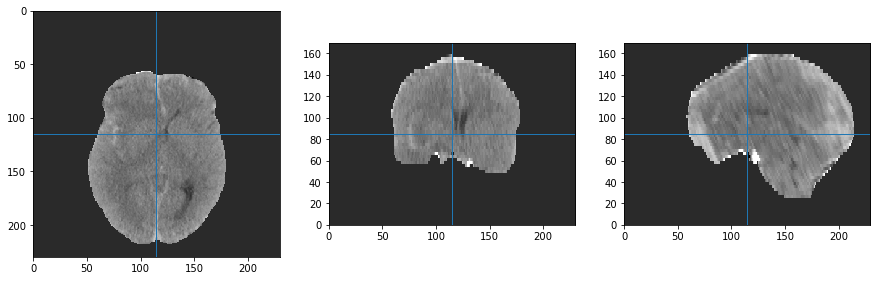

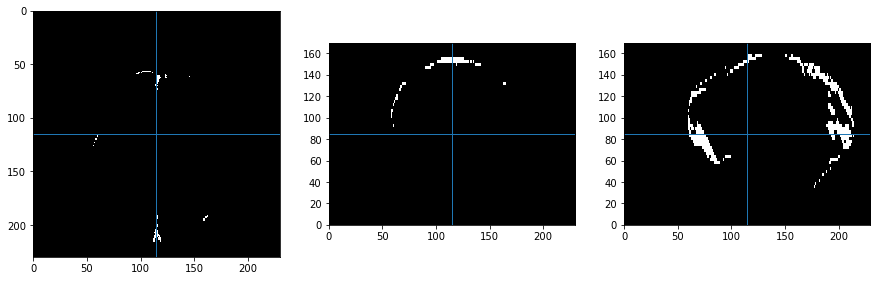

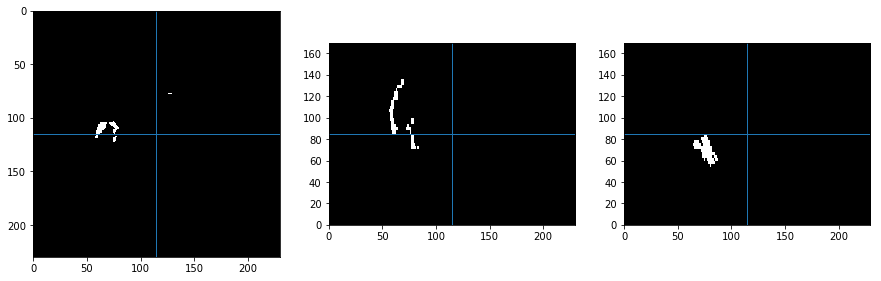

reading path: /Volumes/FAIR/Registered_MPS3/SDH11


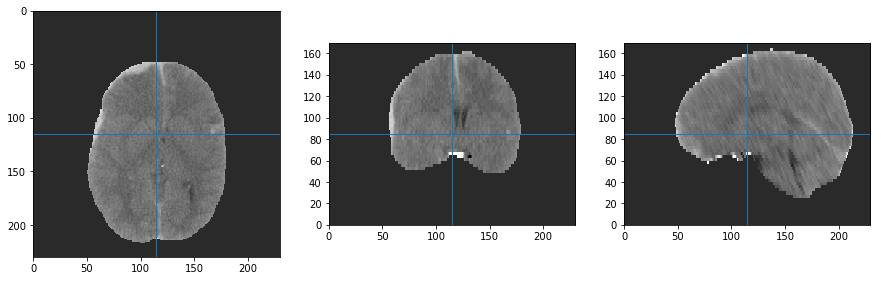

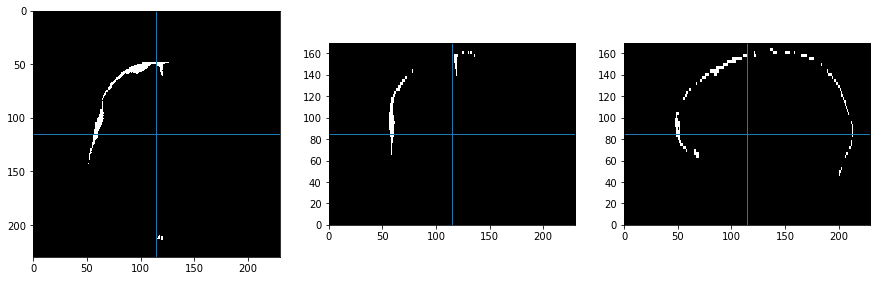

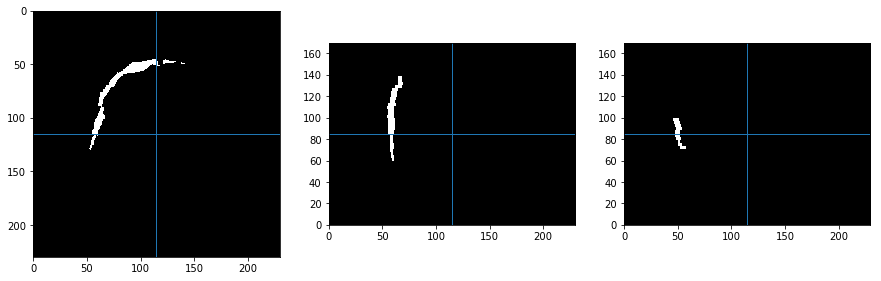

reading path: /Volumes/FAIR/Registered_MPS3/SDH12


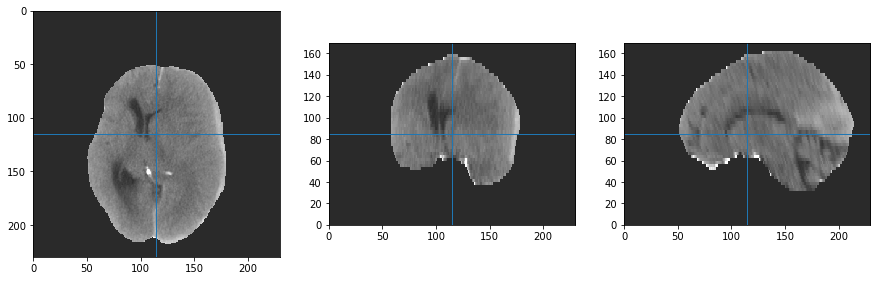

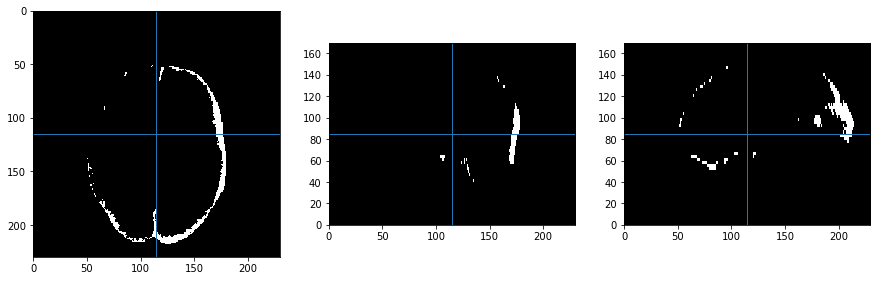

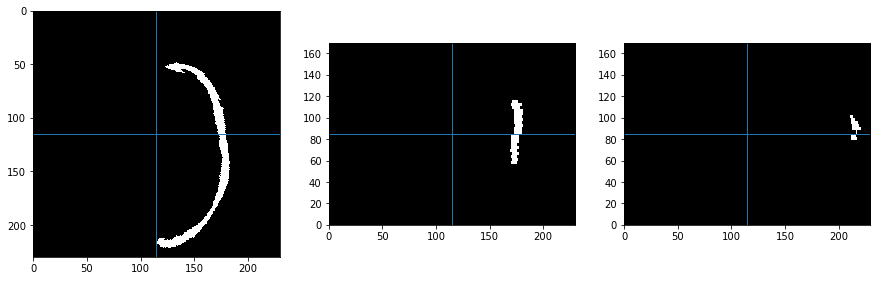

reading path: /Volumes/FAIR/Registered_MPS3/SDH14


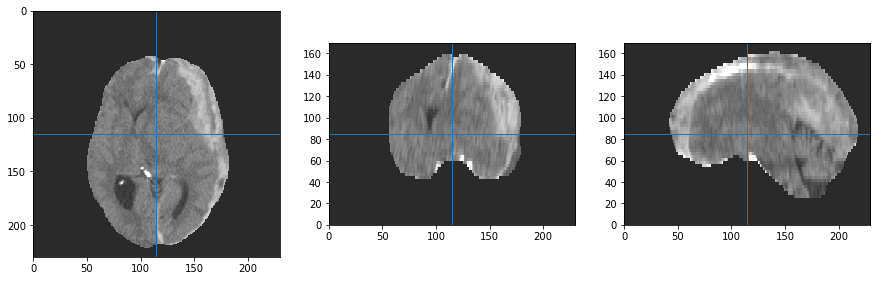

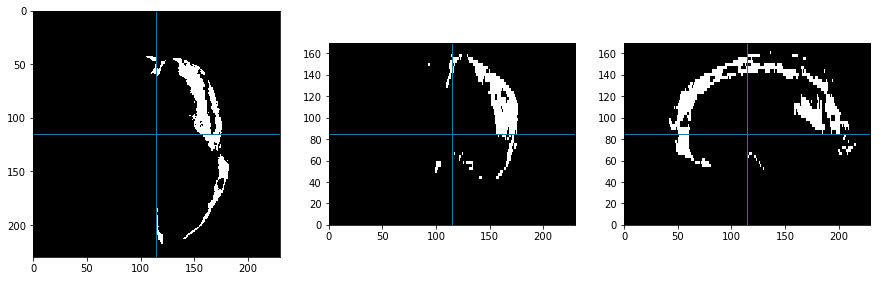

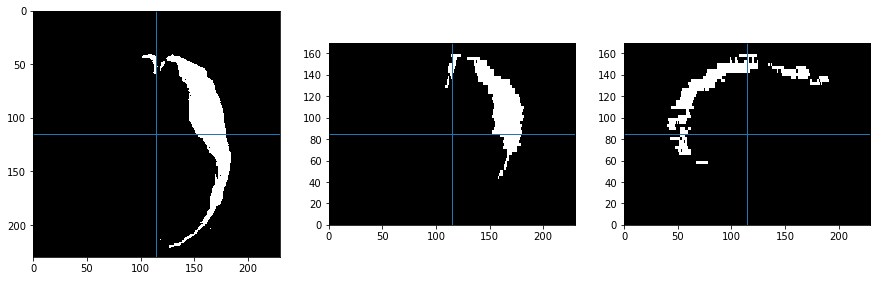

reading path: /Volumes/FAIR/Registered_MPS3/SDH16-2


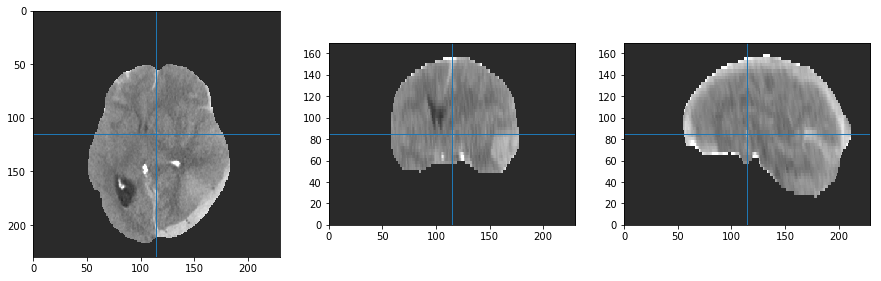

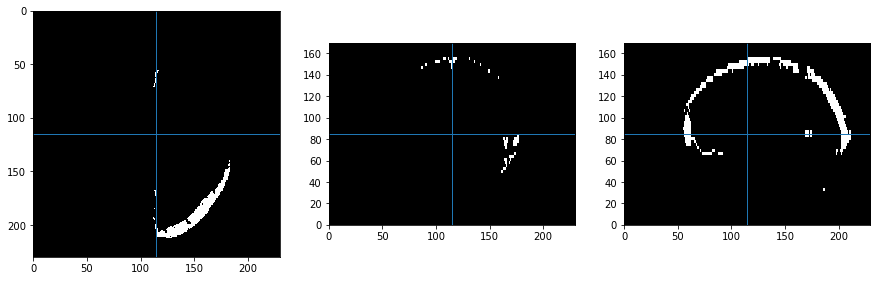

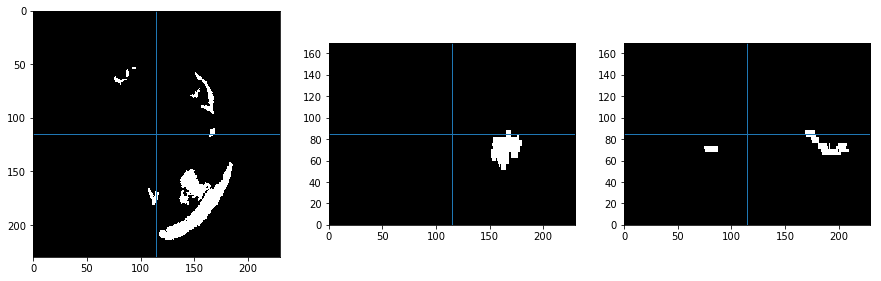

reading path: /Volumes/FAIR/Registered_MPS3/SDH24


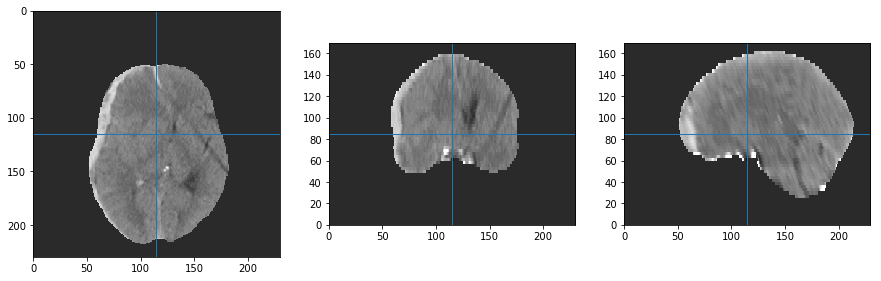

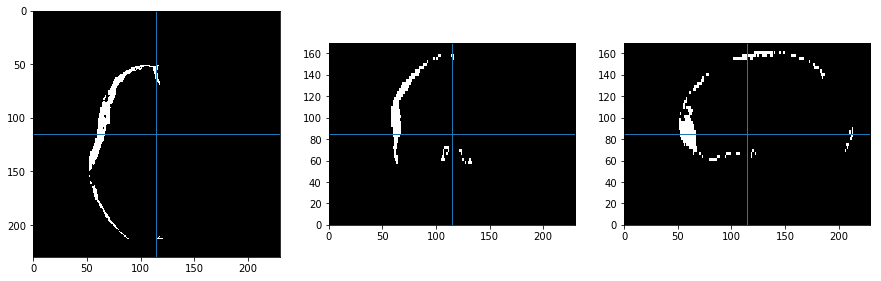

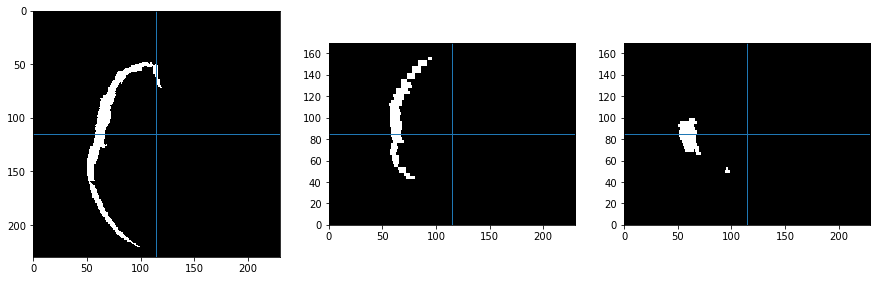

reading path: /Volumes/FAIR/Registered_MPS3/CONT5


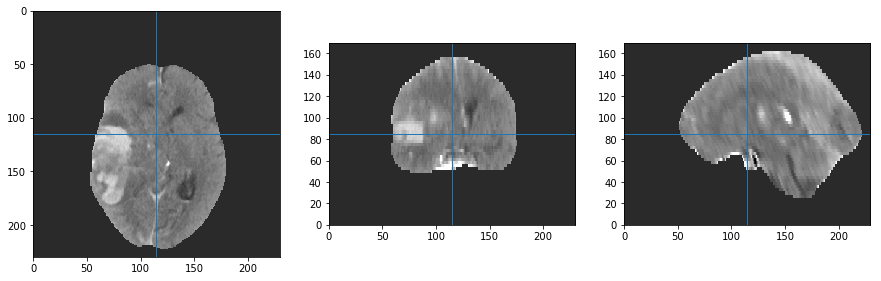

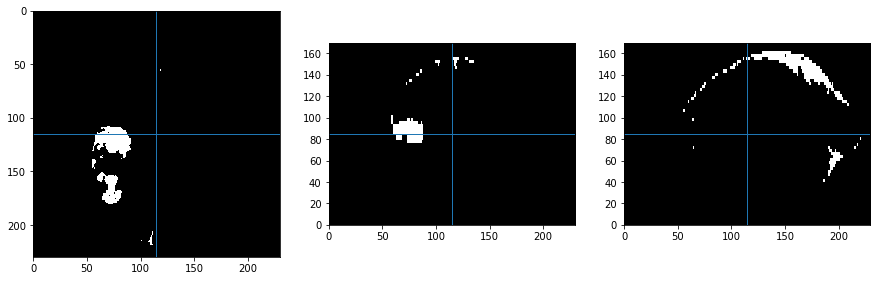

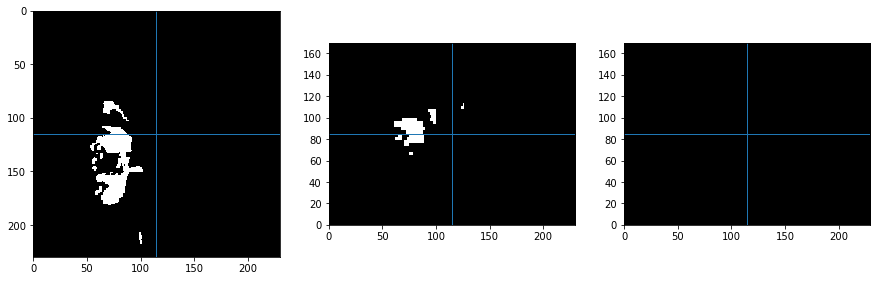

reading path: /Volumes/FAIR/Registered_MPS3/CONT7


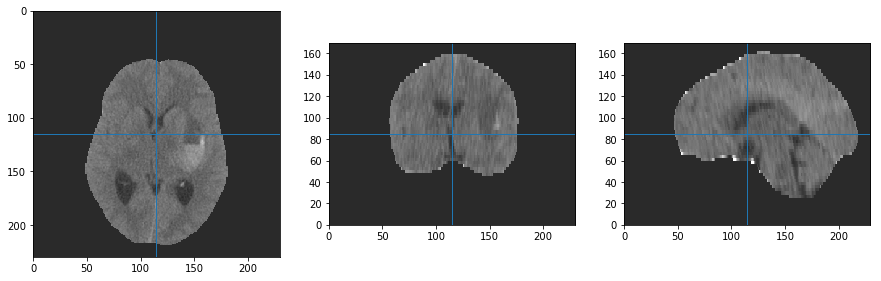

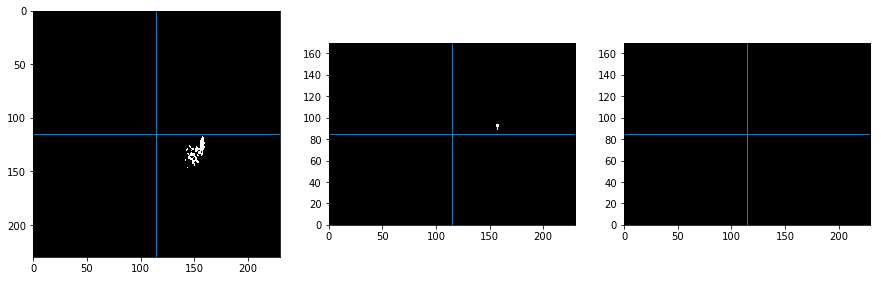

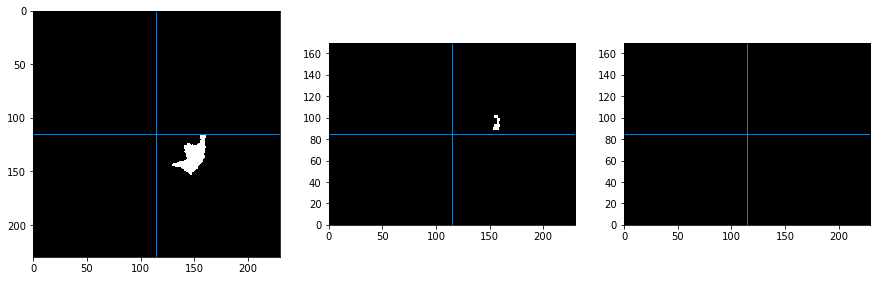

reading path: /Volumes/FAIR/Registered_MPS3/EDH7


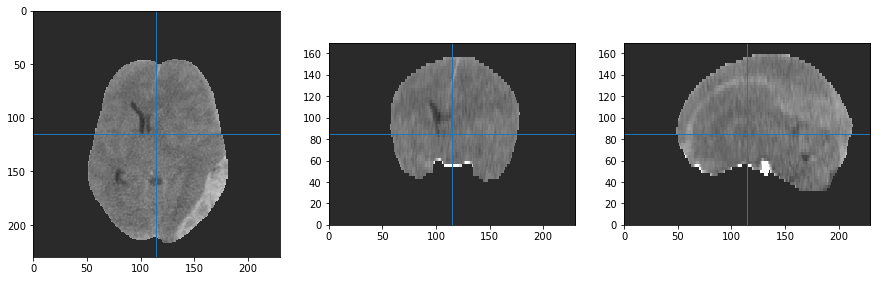

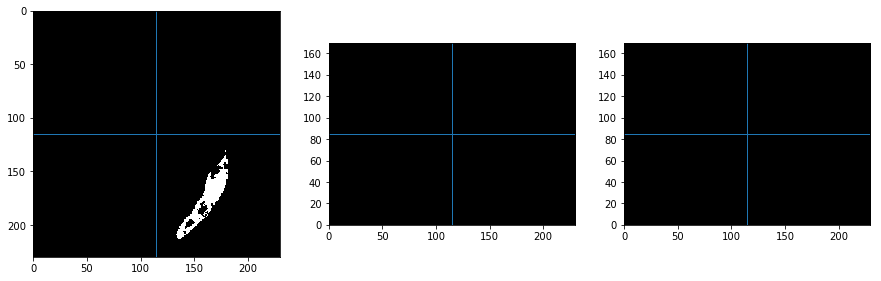

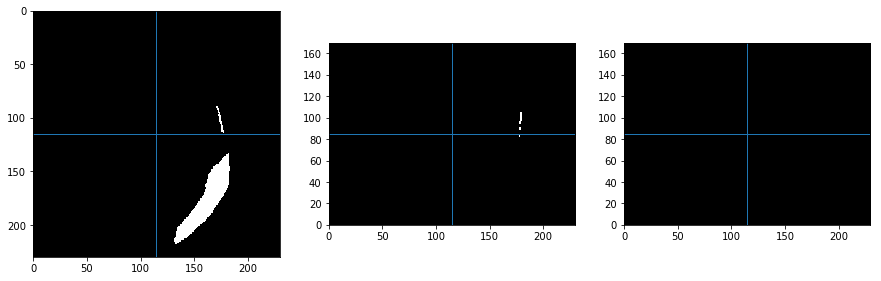

reading path: /Volumes/FAIR/Registered_MPS3/tutorial3


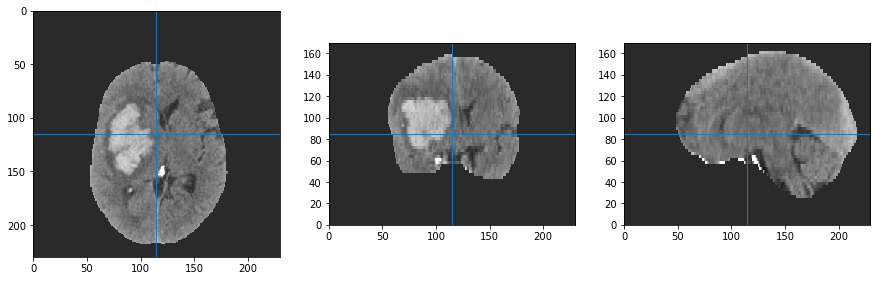

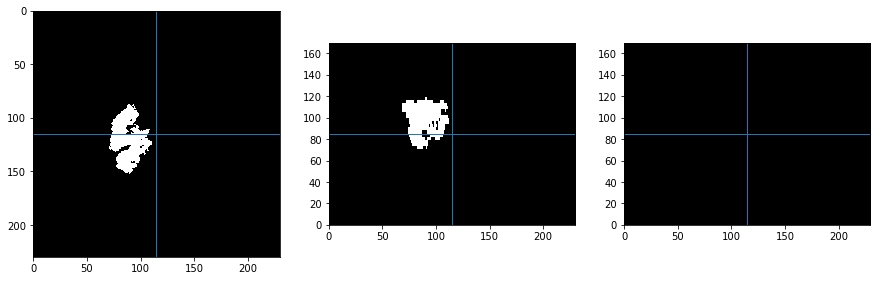

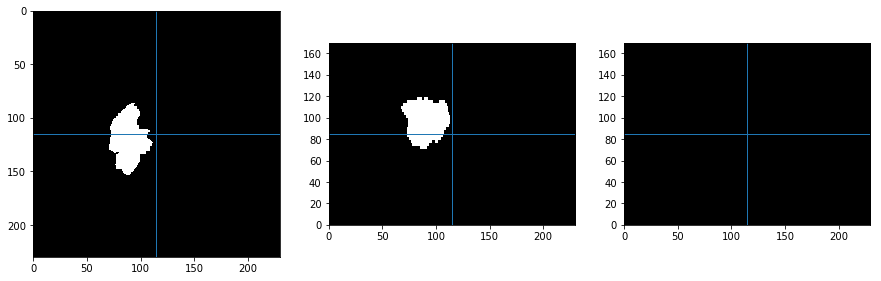

In [48]:
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt

from scipy.ndimage.morphology import binary_opening as bo
from scipy.ndimage.morphology import binary_erosion as be
from scipy.ndimage.morphology import binary_closing as bc
from scipy.ndimage.morphology import binary_fill_holes as bfh

from ipywidgets import interact, fixed
from IPython.display import display
import skimage

import os
os.chdir('/Volumes/FAIR/DC-Image-Analysis/python tutorials')

%matplotlib inline
# Calculate parameters low and high from window and level
import image_viewer
from image_viewer import BiggestRegion,display_image
    

paths = ['/Volumes/FAIR/Registered_MPS3/SDH4/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/SDH7/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/SDH8/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/SDH11/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/SDH12/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/SDH14/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/SDH16-2/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/SDH24/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/CONT5/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/CONT7/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/EDH7/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/tutorial3/CT.nii.gz',
        ]

for i in range(len(paths)):
# for i in range(len(paths)-2,len(paths)-1):

    path = paths[i]
    # reading nii images
    img = sitk.ReadImage(path)
    img_array = sitk.GetArrayFromImage(img)
    auto_lesion = sitk.ReadImage(os.path.split(path)[0] + '/Lesion.nii.gz')
    auto_lesion_array = sitk.GetArrayFromImage(auto_lesion)
    manu_lesion = sitk.ReadImage(os.path.split(path)[0] + '/manu_Lesion.nii.gz')
    manu_lesion_array = sitk.GetArrayFromImage(manu_lesion)
#     lesion_array1 = np.zeros(lesion_array.shape)
#     lesion_array1[lesion_array==2] = 1
#     les = sitk.GetImageFromArray(lesion_array1)
#     les.CopyInformation(lesion)
    # img_array = np.swapaxes(img_array,0,2)
    ConstPixelSpacing = img.GetSpacing()
    dir_name = os.path.split(path)[0]
    file = os.path.split(path)[1]
    print('reading path:',dir_name)
    mask = sitk.ReadImage(os.path.split(path)[0] + '/Brain.nii.gz')
    Mask_array = sitk.GetArrayFromImage(mask)
    masked_array = img_array
    masked_array[Mask_array == 0] = 0
    img_masked = sitk.GetImageFromArray(masked_array)
    img_masked.CopyInformation(img)
    display_image(img_masked, window = 120, level = 40)
    


    display_image(auto_lesion)
    display_image(manu_lesion)
    






# Manually identify the human lesion lables 
# leaving only haematoma lesions

reading path: /Volumes/FAIR/Registered_MPS3/tutorial3


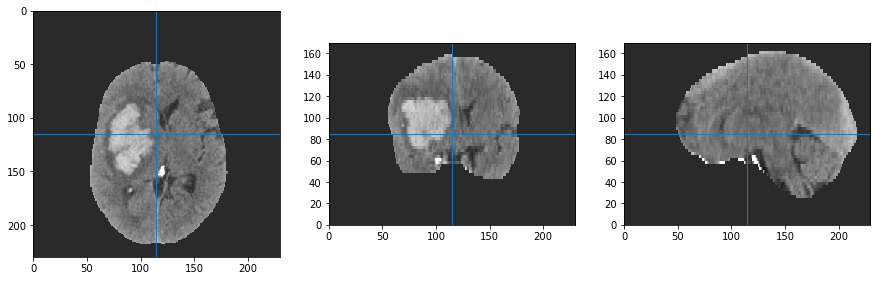

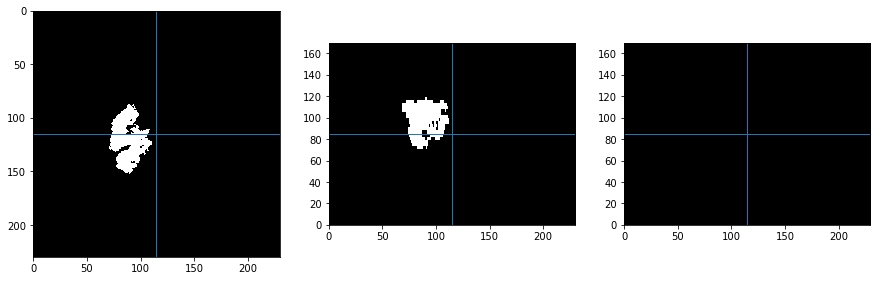

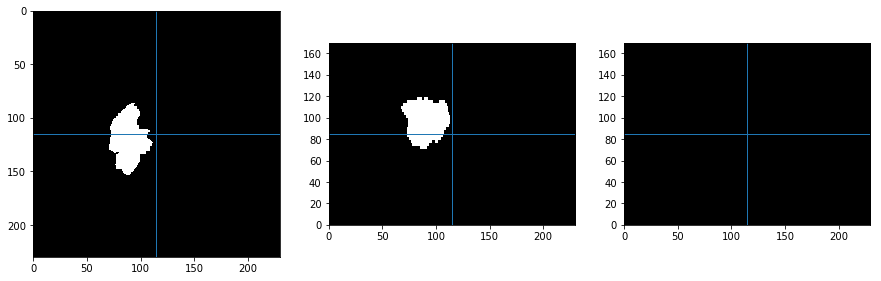

In [45]:
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt

from scipy.ndimage.morphology import binary_opening as bo
from scipy.ndimage.morphology import binary_erosion as be
from scipy.ndimage.morphology import binary_closing as bc
from scipy.ndimage.morphology import binary_fill_holes as bfh

from ipywidgets import interact, fixed
from IPython.display import display
import skimage

import os
os.chdir('/Volumes/FAIR/DC-Image-Analysis/python tutorials')

%matplotlib inline
# Calculate parameters low and high from window and level
import image_viewer
from image_viewer import BiggestRegion,display_image
    

paths = ['/Volumes/FAIR/Registered_MPS3/SDH4/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/SDH7/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/SDH8/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/SDH11/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/SDH12/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/SDH14/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/SDH16-2/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/SDH24/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/CONT5/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/CONT7/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/EDH7/CT.nii.gz',
         '/Volumes/FAIR/Registered_MPS3/tutorial3/CT.nii.gz',
        ]

# for i in range(len(paths)):
for i in range(11,12):

    path = paths[i]
    # reading nii images
    img = sitk.ReadImage(path)
    img_array = sitk.GetArrayFromImage(img)
    auto_lesion = sitk.ReadImage(os.path.split(path)[0] + '/Lesion.nii.gz')
    auto_lesion_array = sitk.GetArrayFromImage(auto_lesion)
    manu_lesion = sitk.ReadImage(os.path.split(path)[0] + '/SEG.nii.gz')
    manu_lesion_array = sitk.GetArrayFromImage(manu_lesion)
    # img_array = np.swapaxes(img_array,0,2)
    ConstPixelSpacing = img.GetSpacing()
    dir_name = os.path.split(path)[0]
    file = os.path.split(path)[1]
    print('reading path:',dir_name)
    mask = sitk.ReadImage(os.path.split(path)[0] + '/Brain.nii.gz')
    Mask_array = sitk.GetArrayFromImage(mask)
    masked_array = img_array
    masked_array[Mask_array == 0] = 0
    img_masked = sitk.GetImageFromArray(masked_array)
    img_masked.CopyInformation(img)
    display_image(img_masked, window = 120, level = 40)
    


    display_image(auto_lesion)
    display_image(manu_lesion)
    







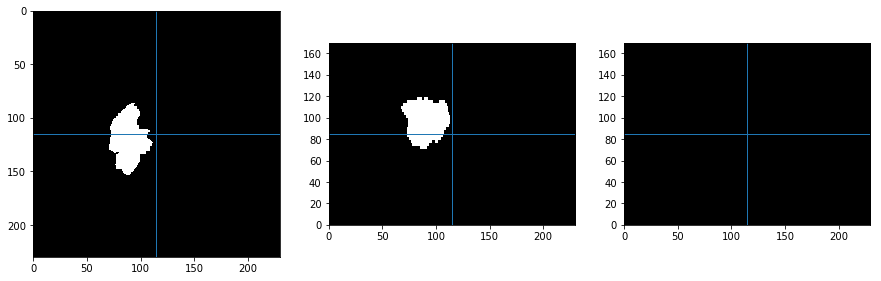

In [46]:
manu_lesion_array1 = np.zeros(manu_lesion_array.shape)
manu_lesion_array1[manu_lesion_array==1] = 1
# manu_lesion_array1[manu_lesion_array==6] = 1
les = sitk.GetImageFromArray(manu_lesion_array1)
les.CopyInformation(manu_lesion)
display_image(les)

In [47]:
os.chdir(dir_name)
sitk.WriteImage(les,'manu_Lesion.nii.gz')